In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mcircles
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [2]:
import pandas as pd

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

In [4]:
dolar_hist = pd.read_csv('dolar.csv', sep=';', parse_dates=['data'], date_parser=dateparse, index_col='data')
dolar_hist.valor = dolar_hist.valor.apply(lambda x: float(x.replace(',', '.')))
dolar_hist = dolar_hist['1999-01':].resample('M').mean()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


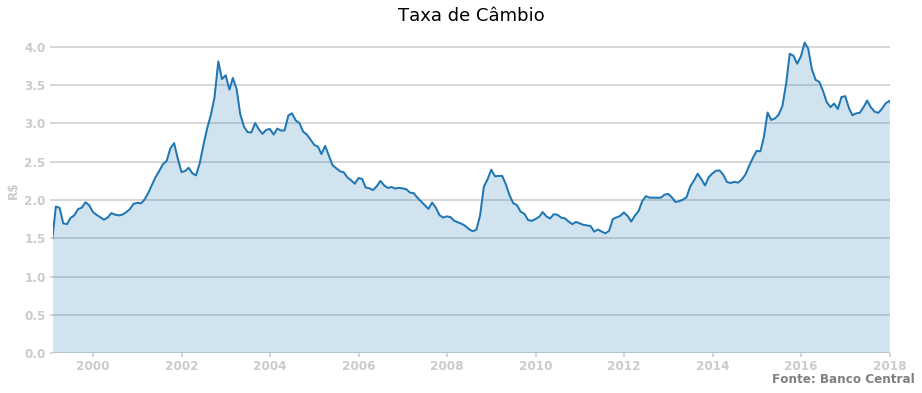

In [5]:
families = ['ubuntu']
matplotlib.rcParams.update({'font.size': 12, 'font.family': families, 'font.weight': 'semibold'})

axis_color = '#cbcbcb'

fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot2grid((1, 1), (0, 0))

plt.grid(color=axis_color, axis='y', linewidth=1.5)

ax1.plot(dolar_hist.index, dolar_hist.valor.tolist(), linewidth=2)
ax1.fill_between(dolar_hist.index, dolar_hist.valor.tolist(), 0, alpha=0.2, zorder=2)
ax1.set_ylim(0)
ax1.set_xlim(pd.datetime(1999,2,1), pd.datetime(2018,1,1))
plt.ylabel('R$', color=axis_color, weight='bold')
plt.title('Taxa de Câmbio', fontsize=18)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis='x', colors=axis_color, width=1.5)
ax1.tick_params(axis='y', colors=axis_color, width=1.5)
ax1.yaxis.label.set_color(axis_color)

ax1.text(0.86, -0.1, 'Fonte: Banco Central',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax1.transAxes,
        color='grey')

plt.show()

## Load data
http://www.mdic.gov.br/index.php/comercio-exterior/estatisticas-de-comercio-exterior/series-historicas

In [6]:
balanca = pd.read_csv('TOTAL.csv', parse_dates=[['CO_ANO', 'CO_MES']], index_col='CO_ANO_CO_MES', thousands=',')
balanca.head()

,DIAS_UTEIS,US_FOB_EXP,KG_EXP,US_FOB_IMP,KG_IMP,SALDO_US_FOB,SALDO_KG,CORRENTE_US_FOB,CORRENTE_KG
CO_ANO_CO_MES,,,,,,,,,
2018-02-01,18.0,17315096600,43244277989,12408033497,10953383811,4907063103,32290894178,29723130097,54197661800
2018-01-01,22.0,16965486736,52906438353,14200817662,12791191394,2764669074,40115246959,31166304398,65697629747
2017-12-01,20.0,17595284030,54978446912,12597512127,12422131931,4997771903,42556314981,30192796157,67400578843
2017-11-01,20.0,16683104126,54910911135,13142503350,12266058525,3540600776,42644852610,29825607476,67176969660
2017-10-01,21.0,18871943089,60907419127,13678839517,11870033252,5193103572,49037385875,32550782606,72777452379


### Prepare data

In [7]:
start_date = '2006-01-01'
end_date = '2017-12-01'
balanca_crise = balanca.resample('QS').sum().loc[start_date:end_date]
x = balanca_crise.index
y_in = balanca_crise.US_FOB_IMP.tolist()
y_out = balanca_crise.US_FOB_EXP.tolist()
negative_balance = (balanca_crise.US_FOB_IMP > balanca_crise.US_FOB_EXP).tolist()
positive_balance = (balanca_crise.US_FOB_IMP < balanca_crise.US_FOB_EXP).tolist()

### Plot

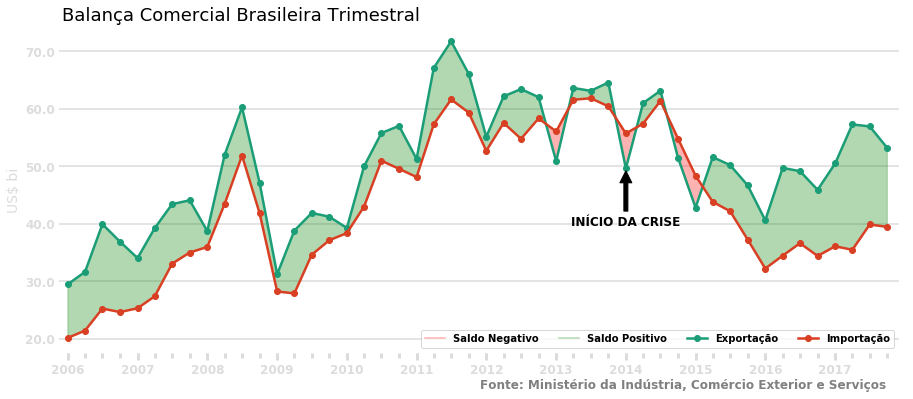

In [8]:
families = ['DejaVu Sans']
matplotlib.rcParams.update({'font.size': 12, 'font.family': families, 'font.weight': 'semibold'})
alpha = 0.3
axis_color = '#dcdcdc'

fig = plt.figure(figsize=(15, 6), facecolor='white')
ax1 = plt.subplot2grid((1, 1), (0, 0))

def build_ticks():
    ax1.set_xlim(pd.to_datetime('2005-12-01'), pd.to_datetime(end_date))
    ax1.tick_params(axis='x', colors=axis_color, width=3, which='minor', length=5)
    ax1.tick_params(axis='x', colors=axis_color, width=3, which='major', length=7)
    ax1.tick_params(axis='y', colors=axis_color, width=1.5)
    ax1.yaxis.label.set_color(axis_color)
    plt.ylabel('US$ bi', fontsize=14)
    def mjrFormatter(x, pos):
        return "{:,}".format(x/1000000000)
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator([1, 4, 7, 10])  # every month
    yearsFmt = mdates.DateFormatter('%Y')
    monthFmt = mdates.DateFormatter('%m')
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(yearsFmt)
    ax1.xaxis.set_minor_locator(months)

def plot_data():
    ax1.plot([], [], label='Saldo Negativo', color='r', alpha=alpha)
    ax1.plot([], [], label='Saldo Positivo', color='g', alpha=alpha)
    ax1.plot(x, y_out , label='Exportação', linewidth=2.5, color='#1b9e77', marker='o')
    ax1.plot(x, y_in, label='Importação', linewidth=2.5, color='#d93f22', marker='o')
    ax1.fill_between(x, y_out, y_in, 
                     alpha=alpha, color='r', interpolate=True,
                     where=negative_balance, zorder=2)
    ax1.fill_between(x, y_out, y_in,
                     alpha=alpha, color='g', interpolate=True,
                     where=positive_balance, zorder=2)

def format_grid():
    plt.grid(color=axis_color, axis='y', linewidth=1.5)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
build_ticks()
plot_data()
format_grid()

plt.title('Balança Comercial Brasileira Trimestral', fontsize=18, loc='left')

plt.legend(fontsize=10, ncol=4, frameon=None)

ax1.text(0.5, -0.12, 'Fonte: Ministério da Indústria, Comércio Exterior e Serviços',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax1.transAxes,
        color='grey')

plt.annotate(
    'INÍCIO DA CRISE',
    xy=(pd.datetime(2014, 1, 1), balanca_crise.loc['2014-01-01'].US_FOB_EXP),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(pd.datetime(2014,1, 1), balanca_crise.loc['2014-01-01'].US_FOB_EXP/1.25),
    horizontalalignment='center')

plt.show()

In [9]:
# http://www.bcb.gov.br/htms/infecon/Seriehist.asp
bal_pag = pd.read_csv('BalPagM.csv')
def pt_month_to_number(month):
    if month == 'Jan':
        return '01'
    if month == 'Fev':
        return '02'
    if month == 'Mar':
        return '03'
    if month == 'Abr':
        return '04'
    if month == 'Mai':
        return '05'
    if month == 'Jun':
        return '06'
    if month == 'Jul':
        return '07'
    if month == 'Ago':
        return '08'
    if month == 'Set':
        return '09'
    if month == 'Out':
        return '10'
    if month == 'Nov':
        return '11'
    if month == 'Dez':
        return '12'

bal_pag.index = pd.to_datetime(bal_pag.ano.map(str) + '-' + bal_pag.mes.map(pt_month_to_number))

In [10]:
start_date = '2002-01-01'
end_date = '2017-12-01'
bal_pag = bal_pag.resample('Y').sum().loc[start_date:end_date]
x = bal_pag.index
y_in = bal_pag.Despesas.tolist()
y_out = bal_pag.Receitas.tolist()
negative_balance = (bal_pag.Despesas > bal_pag.Receitas).tolist()
positive_balance = (bal_pag.Despesas < bal_pag.Receitas).tolist()

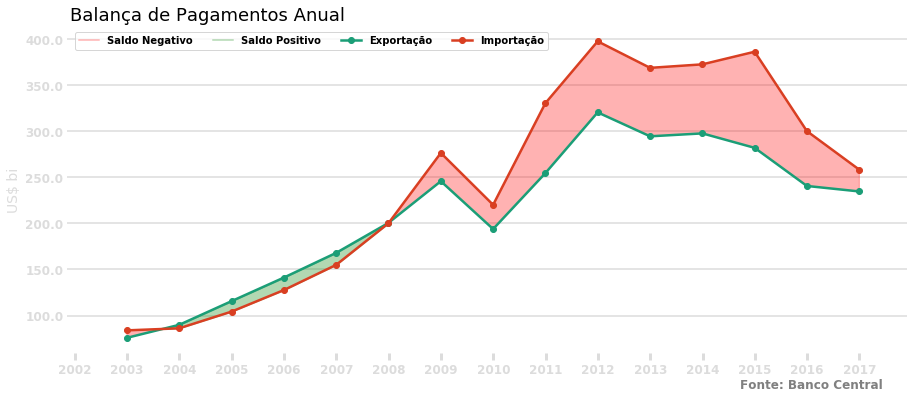

In [11]:
families = ['DejaVu Sans']
matplotlib.rcParams.update({'font.size': 12, 'font.family': families, 'font.weight': 'semibold'})
alpha = 0.3
axis_color = '#dcdcdc'

fig = plt.figure(figsize=(15, 6), facecolor='white')
ax1 = plt.subplot2grid((1, 1), (0, 0))

def build_ticks():
    ax1.set_xlim(pd.to_datetime('2001-12-01'), pd.to_datetime(end_date))
    ax1.tick_params(axis='x', colors=axis_color, width=3, which='minor', length=5)
    ax1.tick_params(axis='x', colors=axis_color, width=3, which='major', length=7)
    ax1.tick_params(axis='y', colors=axis_color, width=1.5)
    ax1.yaxis.label.set_color(axis_color)
    plt.ylabel('US$ bi', fontsize=14)
    def mjrFormatter(x, pos):
        return "{:,}".format(x/1000)
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator([1, 7])  # every month
    yearsFmt = mdates.DateFormatter('%Y')
    monthFmt = mdates.DateFormatter('%m')
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(yearsFmt)
    #ax1.xaxis.set_minor_locator(months)

def plot_data():
    ax1.plot([], [], label='Saldo Negativo', color='r', alpha=alpha)
    ax1.plot([], [], label='Saldo Positivo', color='g', alpha=alpha)
    ax1.plot(x, y_out , label='Exportação', linewidth=2.5, color='#1b9e77', marker='o')
    ax1.plot(x, y_in, label='Importação', linewidth=2.5, color='#d93f22', marker='o')
    ax1.fill_between(x, y_out, y_in, 
                     alpha=alpha, color='r', interpolate=True,
                     where=negative_balance, zorder=2)
    ax1.fill_between(x, y_out, y_in,
                     alpha=alpha, color='g', interpolate=True,
                     where=positive_balance, zorder=2)

def format_grid():
    plt.grid(color=axis_color, axis='y', linewidth=1.5)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
build_ticks()
plot_data()
format_grid()

plt.title('Balança de Pagamentos Anual', fontsize=18, loc='left')

plt.legend(fontsize=10, ncol=4, frameon=None)

ax1.text(0.80, -0.12, 'Fonte: Banco Central',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax1.transAxes,
        color='grey')



plt.show()